# UNAD
## Andres Camilo Ariza Vargas
## Predicción de Supervivientes del Titanic

## Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [129]:
# Se cargan las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Librerias necesarias para realizar la ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay

In [97]:
# Lectura y almacenamiento del archivo a trabajar
Datos = pd.read_csv('./Titanic-Dataset.csv')

# Se realiza lectura del archivo para el análisis exploratorio
Datos.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


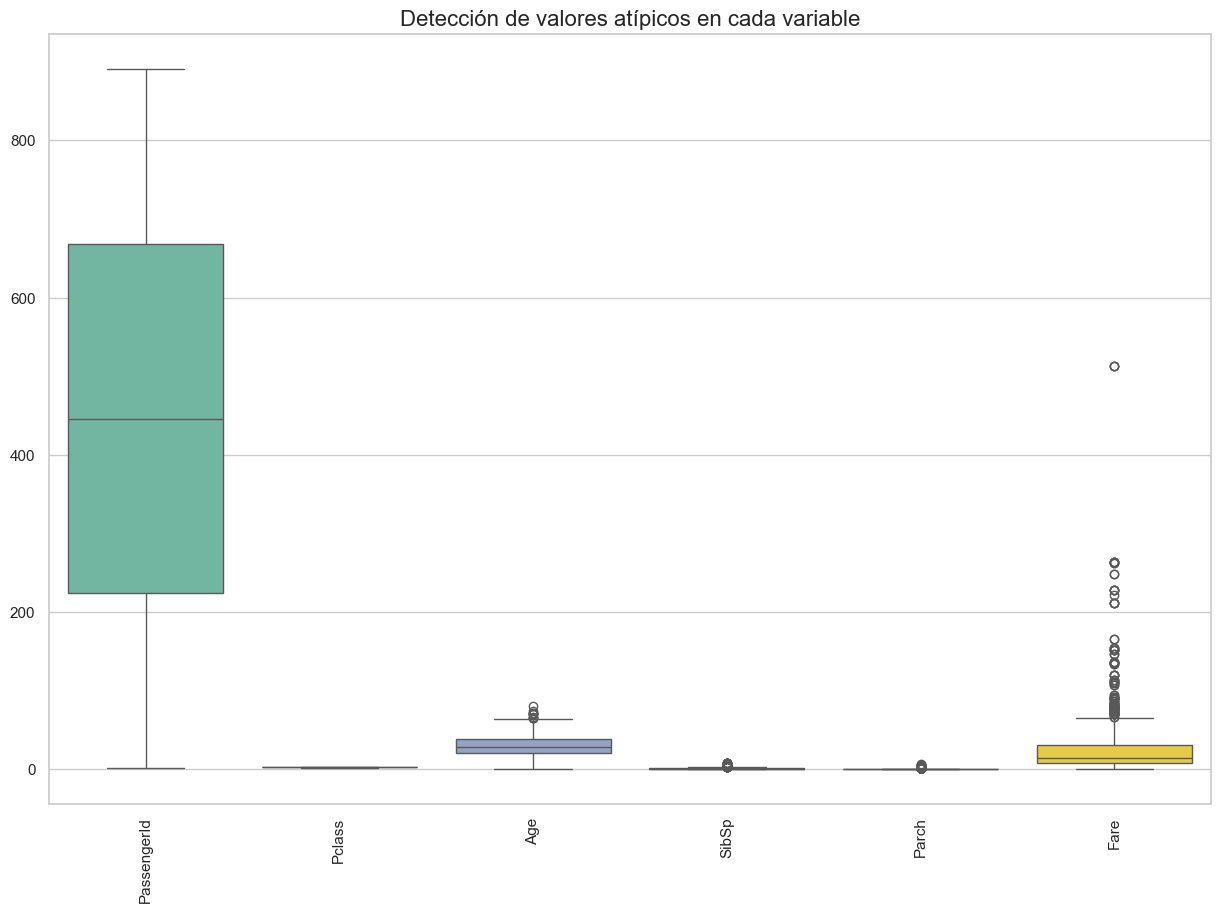

In [61]:
data_filtered = Datos.drop(columns=['Survived'])

# Boxplot para identificar valores atípicos
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_filtered, palette="Set2")
plt.xticks(rotation=90)
plt.title("Detección de valores atípicos en cada variable", fontsize=16)
plt.show()

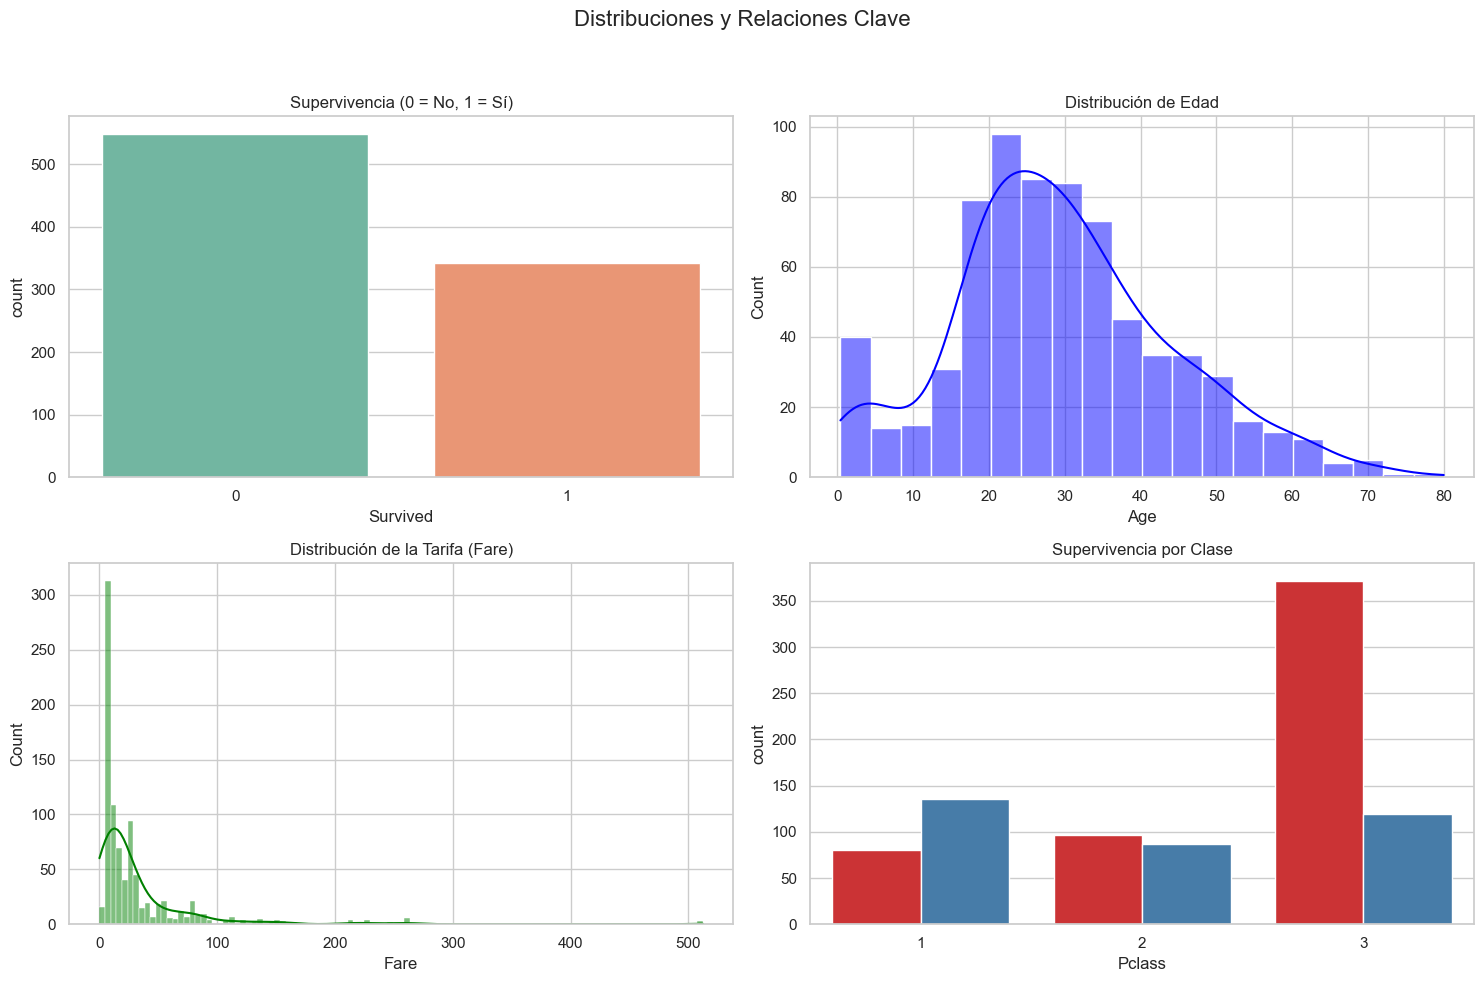

In [63]:
# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Visualización de distribuciones clave
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribuciones y Relaciones Clave', fontsize=16)

# Distribución de la variable objetivo (Survived)
sns.countplot(data=Datos, x='Survived', hue='Survived', ax=axes[0, 0], palette='Set2', legend=False)
axes[0, 0].set_title('Supervivencia (0 = No, 1 = Sí)')

# Distribución de la edad
sns.histplot(data=Datos, x='Age', kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Distribución de Edad')

# Distribución de la tarifa (Fare)
sns.histplot(data=Datos, x='Fare', kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Distribución de la Tarifa (Fare)')

# Supervivencia según clase de pasajero
sns.countplot(data=Datos, x='Pclass', hue='Survived', ax=axes[1, 1], palette='Set1', legend=False)
axes[1, 1].set_title('Supervivencia por Clase')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [65]:
# Resumen estadístico y visualización de valores faltantes
resumen = Datos.describe(include='all')

# Contar valores faltantes en cada columna
datos_faltantes = Datos.isnull().sum()

resumen, datos_faltantes

(        PassengerId    Survived      Pclass                     Name   Sex  \
 count    891.000000  891.000000  891.000000                      891   891   
 unique          NaN         NaN         NaN                      891     2   
 top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
 freq            NaN         NaN         NaN                        1   577   
 mean     446.000000    0.383838    2.308642                      NaN   NaN   
 std      257.353842    0.486592    0.836071                      NaN   NaN   
 min        1.000000    0.000000    1.000000                      NaN   NaN   
 25%      223.500000    0.000000    2.000000                      NaN   NaN   
 50%      446.000000    0.000000    3.000000                      NaN   NaN   
 75%      668.500000    1.000000    3.000000                      NaN   NaN   
 max      891.000000    1.000000    3.000000                      NaN   NaN   
 
                Age       SibSp       Parch  Ticke

## Análisis:

### El dataset cargado tiene las siguientes columnas principales:

* PassengerId: Identificador único de los pasajeros.
* Survived: Variable objetivo (1 para superviviente, 0 para no superviviente).
* Pclass: Clase de boleto del pasajero (1 = 1ra clase, 2 = 2da clase, 3 = 3ra clase).
* Name: Nombre del pasajero.
* Sex: Género del pasajero.
* Age: Edad del pasajero.
* SibSp: Número de hermanos/esposos a bordo.
* Parch: Número de padres/hijos a bordo.
* Ticket: Número de ticket.
* Fare: Tarifa del ticket.
* Cabin: Número de cabina (con valores faltantes).
* Embarked: Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

### Valores faltantes:

* Age: 177 valores faltantes.
* Cabin: 687 valores faltantes (la mayoría).
* Embarked: 2 valores faltantes.

### Observaciones generales:

* Survived tiene valores binarios (0 = no sobrevivió, 1 = sobrevivió).
* Pclass tiene tres valores posibles (1, 2, 3).
* Sex tiene dos categorías: male y female.
* Fare muestra gran variabilidad (mínimo 0, máximo 512.33).
* Cabin tiene muchas categorías únicas y una gran cantidad de datos faltantes, lo que sugiere que podría descartarse o procesarse de otra forma.

## Observaciones de las visualizaciones:

### Supervivencia (Survived):
* La mayoría de los pasajeros no sobrevivieron (valor 0), lo que indica un desequilibrio en la clase objetivo.
Distribución de Edad (Age):
* La mayoría de los pasajeros tenían entre 20 y 40 años.
Hay una ligera cola hacia la derecha (personas mayores).

### Distribución de la Tarifa (Fare):
* La mayoría de las tarifas están concentradas entre 0 y 50.
* Existen algunos valores atípicos, con tarifas muy altas.

### Supervivencia por Clase (Pclass):
* Los pasajeros de primera clase tienen mayores probabilidades de supervivencia en comparación con los de segunda y tercera clase.

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [99]:
# Imputación de valores faltantes
# En los datos de la columna "Age", se usará la mediana debido a la asimetría en su distribución.
Datos['Age'] = Datos['Age'].fillna(Datos['Age'].median())

# En los datos de la columna "Embarked", se completara con el valor más frecuente (moda).
Datos['Embarked'] = Datos['Embarked'].fillna(Datos['Embarked'].mode()[0])

# Al tener tantos valores faltantes se descartará la columna "Cabin".
Datos.drop(columns=['Cabin'], inplace=True)

# Convertir variables categóricas a numéricas
# "Sex": male -> 0, female -> 1
Datos['Sex'] = Datos['Sex'].map({'male': 0, 'female': 1})

# "Embarked": C -> 0, Q -> 1, S -> 2
Datos['Embarked'] = Datos['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Se verifican nuevamente los valores faltantes
datos_faltantes_dt = Datos.isnull().sum()

datos_faltantes_dt

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [101]:
Datos.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,2
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,0


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [111]:
# Escalar las características numéricas para el análisis
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(Datos.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket']))

# Aplicar SelectKBest con chi-cuadrado
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(features_scaled, Datos['Survived'])

# Crear un DataFrame con las puntuaciones
feature_scores = pd.DataFrame({
    'Feature': Datos.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket']).columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print("Puntuaciones de características relevantes:")
print(feature_scores)

Puntuaciones de características relevantes:
    Feature       Score
1       Sex  170.348127
0    Pclass   27.232933
5      Fare    8.819172
6  Embarked    5.101262
4     Parch    1.682917
3     SibSp    0.322733
2       Age    0.275991


In [206]:
# Selección de características más relevantes
caracteristicas_seleccionadas = ['Sex', 'Pclass', 'Fare', 'Embarked', 'Parch']

# División de datos en características (X) y variable objetivo (y)
X = Datos[caracteristicas_seleccionadas]
y = Datos['Survived']

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [208]:
# División del dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [210]:
# Entrenamiento del modelo de regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [212]:
# Evaluación del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nPrecisión del modelo:")
print(accuracy_score(y_test, y_pred))

Matriz de Confusión:
[[84 21]
 [19 55]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.72      0.74      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


Precisión del modelo:
0.776536312849162


## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

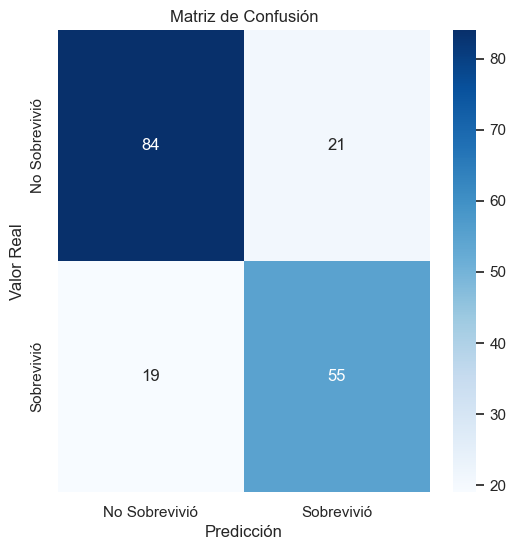

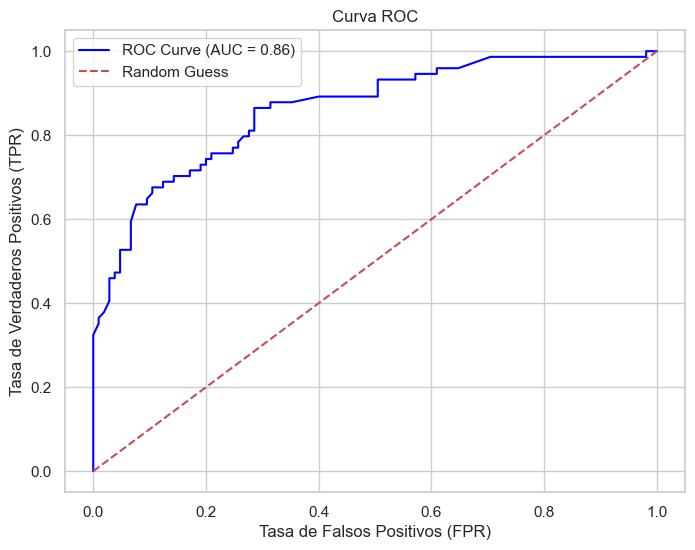

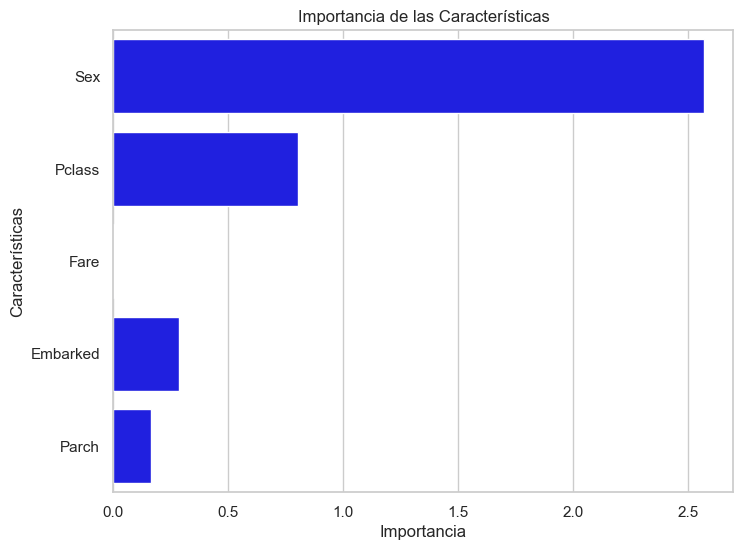

In [214]:
# 1. Matriz de Confusión
def plot_confusion_matrix(y_test, y_pred):
    plt.figure(figsize=(6, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Sobrevivió', 'Sobrevivió'], yticklabels=['No Sobrevivió', 'Sobrevivió'])
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.title('Matriz de Confusión')
    plt.show()

# 2. Curva ROC
def plot_roc_curve(y_test, y_prob):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

# 3. Importancia de Características
def plot_feature_importance(model, features):
    plt.figure(figsize=(8, 6))
    importance = abs(model.coef_[0])  # Importancia de las características
    sns.barplot(x=importance, y=features, color='blue')  # Eliminado palette
    plt.xlabel('Importancia')
    plt.ylabel('Características')
    plt.title('Importancia de las Características')
    plt.show()

# Llamar a las funciones
y_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Matriz de Confusión
plot_confusion_matrix(y_test, y_pred)

# Curva ROC
plot_roc_curve(y_test, y_prob)

# Importancia de Características
plot_feature_importance(logistic_model, caracteristicas_seleccionadas)

## 8. Interpretar, analizar y documentar los resultados obtenidos.

### 1. Matriz de Confusión

La matriz de confusión muestra los siguientes resultados:

* Verdaderos Negativos (84): El modelo predijo correctamente que 84 pasajeros no sobrevivieron.
* Falsos Positivos (21): El modelo predijo erróneamente que 21 pasajeros sobrevivieron cuando no lo hicieron.
* Falsos Negativos (19): El modelo predijo erróneamente que 19 pasajeros no sobrevivieron cuando sí lo hicieron.
* Verdaderos Positivos (55): El modelo predijo correctamente que 55 pasajeros sobrevivieron.

Si bien el modelo tiene buen desempeño es posible mejorarlo reduciendo los falsos positivos y falsos negativos.

### 2. Reporte de Clasificación

El reporte de clasificación incluye:

#### Clase 0 (No sobrevivió):
* Precisión: 82% de las veces que el modelo predijo "no sobrevivió", fue correcto.
* Recall: 80% de las personas que realmente no sobrevivieron fueron correctamente identificadas.
* F1-Score: Combinando precisión y recall, obtenemos un 81%.

#### Clase 1 (Sobrevivió):
* Precisión: 72% de las veces que el modelo predijo "sobrevivió", fue correcto.
* Recall: 74% de las personas que realmente sobrevivieron fueron identificadas correctamente.
* F1-Score: Un puntaje de 73%.

El modelo es más preciso para identificar a quienes no sobrevivieron que a quienes sí sobrevivieron.

### 3. Curva ROC y AUC

 * AUC = 0.85: El modelo tiene un buen rendimiento para separar las clases (supervivientes y no supervivientes). Cuanto más cercano a 1, mejor es el desempeño.

### 4. Importancia de Características

De la gráfica de importancia:

* Sex (Género): Es la característica más influyente en la predicción de la supervivencia, lo cual es consistente con las reglas del Titanic (mujeres y niños primero).
* Pclass (Clase): La clase socioeconómica también afecta las probabilidades de supervivencia, ya que los pasajeros de primera clase tenían más probabilidades de sobrevivir.
* Fare (Tarifa): El precio del boleto está relacionado con el estatus socioeconómico, lo cual también impacta la supervivencia.
* Embarked (Puerto de Embarque): Tiene una menor influencia, pero puede reflejar diferencias regionales o de acceso a los botes salvavidas.

### 5. Precisión Global

El modelo tiene una precisión global de 77,65%, lo que indica que el modelo está acertando en casi un 80% laslas predicciones. Sin embargo, hay espacio para mejorar, especialmente en la predicción de la Clase 1.

### 6. Fortalezas:
* Buena precisión para la clase "No sobrevivió" (Clase 0): Con una precisión del 82%, el modelo tiene un buen rendimiento en identificar correctamente a los que no sobrevivieron.
* Performance razonable en general: La precisión global del 77.7% es un indicador positivo para un modelo de clasificación binaria.

### 7. Debilidades:
* Clase "Sobrevivió" (Clase 1): Aunque el modelo tiene un recall aceptable (74%), la precisión es más baja (72%), lo que significa que aún existe un número considerable de falsos positivos.
* Falsos negativos: La cantidad de falsos negativos (19) sigue siendo una preocupación, especialmente en un contexto donde la identificación correcta de los supervivientes podría ser más crítica.